In [10]:
using Plots, CSV, DataFrames, LsqFit, LaTeXStrings

In [77]:
df1 = CSV.read("Table1.csv", DataFrame)
df2 = CSV.read("Table2.csv", DataFrame)
df3 = CSV.read("Table3.csv", DataFrame)
df4 = CSV.read("Table4.csv", DataFrame)
df5 = CSV.read("Table5.csv", DataFrame);

Line Regulation

Graph 1

In [12]:
Iz = df1[!, 3]
Is = df1[!, 2]

31-element Vector{Float64}:
 0.0
 0.0
 0.12
 0.23
 0.35
 0.46
 0.12
 0.23
 0.58
 0.69
 ⋮
 2.11
 2.3
 2.5
 2.74
 3.01
 3.24
 3.41
 3.67
 3.89

In [26]:
ind

10-element Vector{Int64}:
 21
 23
 24
 25
 26
 27
 28
 29
 30
 31

In [32]:
f = curve_fit((x, p) -> p[1]*x .+ p[2], Iz[23:end], Is[23:end], [1.0, 0.0])
errors = estimate_errors(f, 0.95)

2-element Vector{Float64}:
 0.03560667960771718
 0.04109791727031088

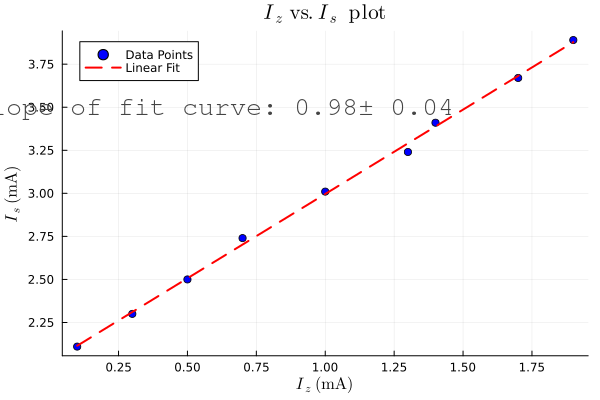

In [35]:
scatter(Iz[23:end], Is[23:end], label="Data Points", xlabel=L"I_z \ \mathrm{(mA)}", ylabel=L"I_s  \ \mathrm{(mA)}", title=L"I_z \ \mathrm{vs.}  I_s \ \ \mathrm{plot}", lw=2, color="blue", legend=:topleft, grid=:on)
plot!(Iz[23:end], f.param[1].*Iz[23:end] .+ f.param[2], label="Linear Fit", lw=2, color="red", linestyle=:dash)
annotate!(0.6, 3.5, "Slope of fit curve: $(round(f.param[1],digits=3))± $(round(errors[1], digits=2))", :color)

In [36]:
savefig("Zener_line_Is_vs_Iz.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_line_Is_vs_Iz.svg"

In [13]:
df1[!,3][22]=0.05

0.05

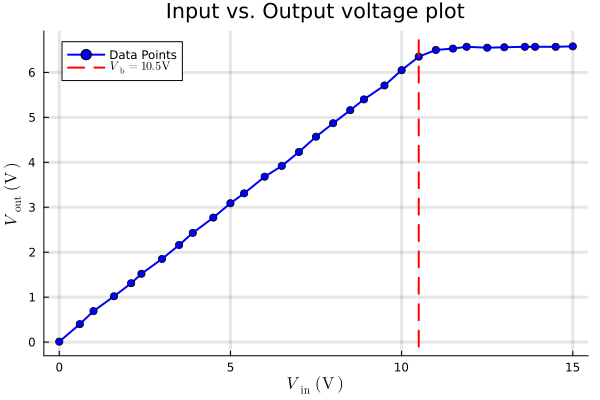

In [28]:
plot()
x=df1[:,1]
y = df1[:,4]
plot!(x,y, marker=:circle, label="Data Points", xlabel=L"V_{\mathrm{in}} \ \mathrm{(V)}", ylabel=L"V_{\mathrm{out}} \ \mathrm{(V)}", title="Input vs. Output voltage plot", lw=2, color="blue", legend=:topleft, grid=:on)
plot!([10.5,10.5], [-0.1,6.72], label=L"V_\mathrm{b} = 10.5 \mathrm{V}", lw=2, color="red", linestyle=:dash)
plot!(gridwidth=3)

In [29]:
savefig("Zener_line_V0_vs_Vin.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_line_V0_vs_Vin.svg"

Load Regulation

Without Rc

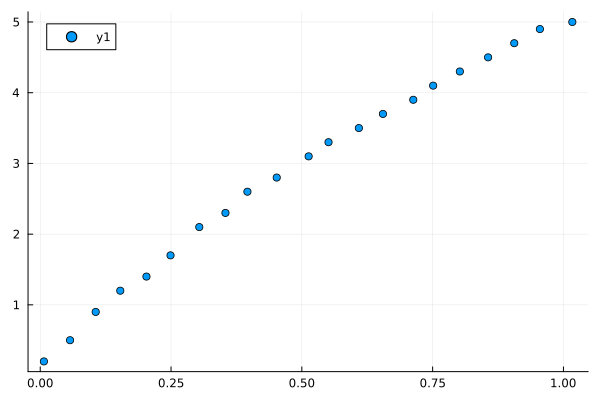

In [33]:
x = df2[!,4]
y = df2[!,1]
scatter(y,x)

With Rc

In [36]:
Iz = df3[!, 2]
Il = df3[!, 3];

In [37]:
f = curve_fit((x, p) -> p[1]*x .+ p[2], Il, Iz, [1.0, 0.0])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([-0.9883774262931341, 4.053200198066225], [0.017379737988601818, -0.04134177890364299, -0.06041197300709422, -0.0698308443217508, 0.02958802699290608, 0.07005292994118095, 0.0312151873118669, -0.05739010384330889, 0.03226121894548539, 0.013074799104965784, 0.03365592779030946, 0.03423705647565223, -0.024716911890729776, -0.03425200894245517, -0.03378710599418033, 0.006445345479957343, 0.09574799105754472, -0.041927494201082105], [1.2199999999729996 1.0000000000048899; 1.3300000000210594 1.0000000000048899; … ; 1.9400000000075592 1.0000000000048899; 2.140000000004936 1.0000000000048899], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

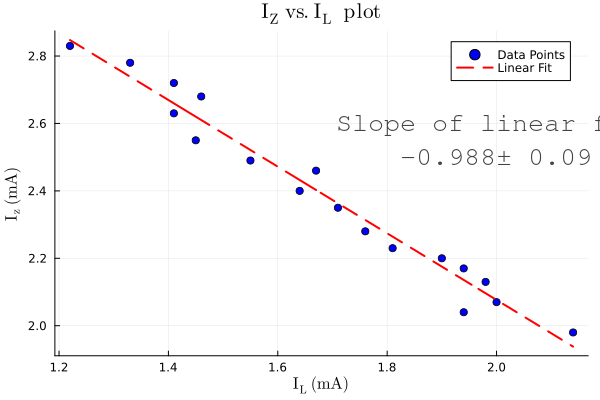

In [47]:
scatter(Il, Iz, marker=:circle, label="Data Points", xlabel=L"\mathrm{I_L} \ \mathrm{(mA)}", ylabel=L"\mathrm{I_z}  \ \mathrm{(mA)}", title=L"\mathrm{I_Z}\ \mathrm{vs.}  \mathrm{I_L} \ \ \mathrm{plot}", lw=2, color="blue", legend=:topright, grid=:on)
plot!(Il, f.param[1].*Il .+ f.param[2], label="Linear Fit", lw=2, color="red", linestyle=:dash)
errors = estimate_errors(f, 0.95)
annotate!(2.0, 2.6, "Slope of linear fit:", :color)
annotate!( 2.0, 2.5,"$(round(f.param[1],digits=3))± $(round(errors[1], digits=2))", :color)

In [48]:
savefig("Zener_load_Iz_vs_Il.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_load_Iz_vs_Il.svg"

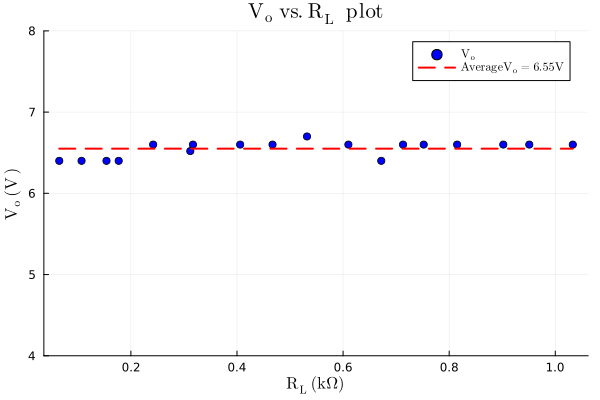

In [67]:
Rl = df3[!, 1]
Vz = df3[!, 4]
avg = round(sum(Vz)/length(Vz), digits=2)
scatter(Rl,Vz,ylim =(4,8), label=L"\mathrm{V_o}", xlabel=L"\mathrm{R_L} \ \mathrm{(k\Omega)}", ylabel=L"\mathrm{V_o}  \ \mathrm{(V)}", title=L"\mathrm{V_o} \ \mathrm{vs.}  \mathrm{R_L} \ \ \mathrm{plot}", lw=2, color="blue", legend=:topright, grid=:on)
plot!( Rl, avg*ones(length(Rl)), label=L"\mathrm{Average V_o} = %$avg \mathrm{V}", lw=2, color="red", linestyle=:dash)

In [68]:
savefig("Zener_load_Vo_vs_Rl.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/Zener_load_Vo_vs_Rl.svg"

In [ ]:
s

IC Line Regulation

In [69]:
Vin = df4[!, 2]
Vo = df4[!, 4];

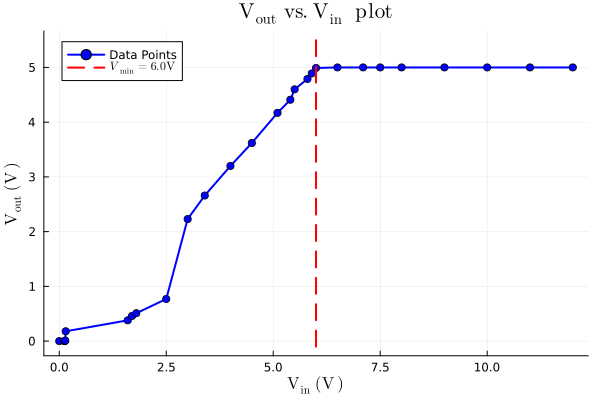

In [75]:
plot(Vin, Vo, marker=:circle, label="Data Points", xlabel=L"\mathrm{V_{in}} \ \mathrm{(V)}", ylabel=L"\mathrm{V_{out}}  \ \mathrm{(V)}", title=L"\mathrm{V_{out}} \ \mathrm{vs.}  \mathrm{V_{in}} \ \ \mathrm{plot}", lw=2, color="blue", legend=:topleft, grid=:on)
plot!([6.0, 6.0], [-0.1,5.5], label=L"V_{\mathrm{min}} = 6.0 \mathrm{V}", lw=2, color="red", linestyle=:dash)

In [76]:
savefig("IC_line_Vo_vs_Vin.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/IC_line_Vo_vs_Vin.svg"

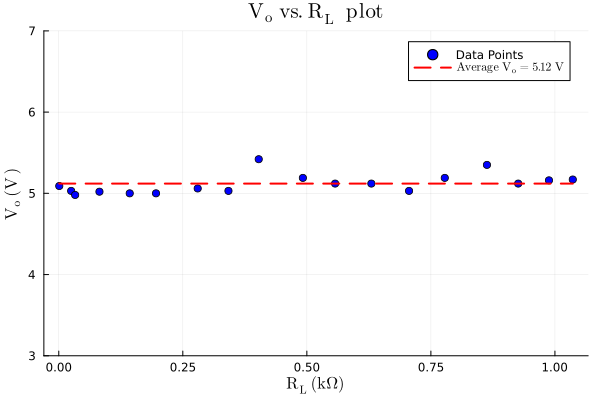

In [90]:
x = df5[!, 1]
y = df5[!, 3]
avg = round(sum(y)/length(y), digits=2)
scatter(x,y, ylim=(3,7), label="Data Points", xlabel=L"\mathrm{R_L} \ \mathrm{(k\Omega)}", ylabel=L"\mathrm{V_o}  \ \mathrm{(V)}", title=L"\mathrm{V_o} \ \mathrm{vs.}  \mathrm{R_L} \ \ \mathrm{plot}", lw=2, color="blue", legend=:topright, grid=:on)
plot!(x, avg*ones(length(x)), label=L"\mathrm{Average \ V_o} = %$avg \ \mathrm{V}", lw=2, color="red", linestyle=:dash)


In [91]:
savefig("IC_load_Vo_vs_Rl.svg")

"/home/shaggy1304/IISER/IISER_Courses/Sem_6/PH3204/Expt_1/Report/IC_load_Vo_vs_Rl.svg"